# Weather Forecasting using Python

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data from the csv file
df = pd.read_csv("E:/Weather Data in India from 1901 to 2017.csv", index_col = 0)

In [3]:
# Looking at the top 5 rows to know about the data
df.head()

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98  26.26  25.08   
1  1902  19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05  25.95  24.37   
2  1903  18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63  26.34  24.57   
3  1904  17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73  25.84  24.36   
4  1905  17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47  26.29  26.16   

     NOV    DEC  
0  21.73  18.95  
1  21.33  18.78  
2  20.96  18.29  
3  21.07  18.84  
4  22.07  18.71

In [4]:
# Reshaping the data using melt function
df1 = pd.melt(df, id_vars='YEAR', value_vars=df.columns[1:])
df1.head()

YEAR variable  value
0  1901      JAN  17.99
1  1902      JAN  19.00
2  1903      JAN  18.32
3  1904      JAN  17.77
4  1905      JAN  17.40

In [5]:
df1['Date'] = df1['variable'] + ' ' + df1['YEAR'].astype(str)  
# Converting string to datetime object:
df1.loc[:,'Date'] = df1['Date'].apply(lambda x : datetime.strptime(x, '%b %Y')) 
df1.head()

YEAR variable  value       Date
0  1901      JAN  17.99 1901-01-01
1  1902      JAN  19.00 1902-01-01
2  1903      JAN  18.32 1903-01-01
3  1904      JAN  17.77 1904-01-01
4  1905      JAN  17.40 1905-01-01

In [6]:
df1.describe() # Description of the dataframe

YEAR        value
count  1404.000000  1404.000000
mean   1959.000000    24.294160
std      33.785791     3.516446
min    1901.000000    17.250000
25%    1930.000000    21.067500
50%    1959.000000    25.570000
75%    1988.000000    27.240000
max    2017.000000    30.780000

In [7]:
df1.columns=['Year', 'Month', 'Temperature', 'Date'] # Giving column names
df1.sort_values(by='Date', inplace=True) # Sorting by date
fig = go.Figure(layout = go.Layout(yaxis=dict(range=[0, df1['Temperature'].max()+1])))
fig.add_trace(go.Scatter(x=df1['Date'], y=df1['Temperature'])) # Giving values for X and Y axes of the graph
fig.update_layout(title='Temperature Throught Timeline:',
                 xaxis_title='Time', yaxis_title='Temperature in Degrees') 
fig.update_layout(xaxis=go.layout.XAxis(
        rangeselector=dict(
        buttons=list([dict(label="Whole View", step="all"),  # Using button to switch between different modes
                      dict(count=1,label="One Year View",step="year",stepmode="todate"),
                      dict(count=2,label="One Month View",step="month",stepmode="todate")
                     ])),
        rangeslider=dict(visible=True),type="date")
)
fig.show()

In [8]:
# Getting the highest and lowest average temperature of India between 1901 to 2017
print(df1.loc[df1["Temperature"]==df1["Temperature"].max()])
print(df1.loc[df1["Temperature"]==df1["Temperature"].min()])

     Year Month  Temperature       Date
488  1921   MAY        30.78 1921-05-01
    Year Month  Temperature       Date
17  1918   JAN        17.25 1918-01-01


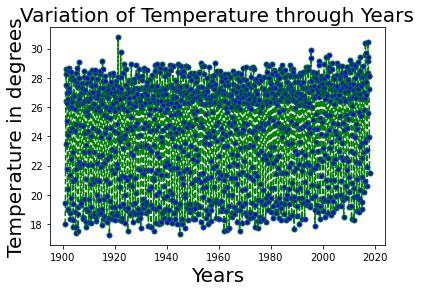

In [9]:
# Plotting the variation of temperature through the years
plt.plot(df1['Date'], df1['Temperature'], color='green', linestyle='dashed', marker='o', markersize=5, markerfacecolor='blue')
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Temperature in degrees', fontsize=20)
plt.title('Variation of Temperature through Years', fontsize=20)
plt.show()

In [10]:
# Setting color style,theme and fonts through seaborn
sns.set_theme(style="darkgrid",palette="pastel")
sns.set(font_scale = 1.5)

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

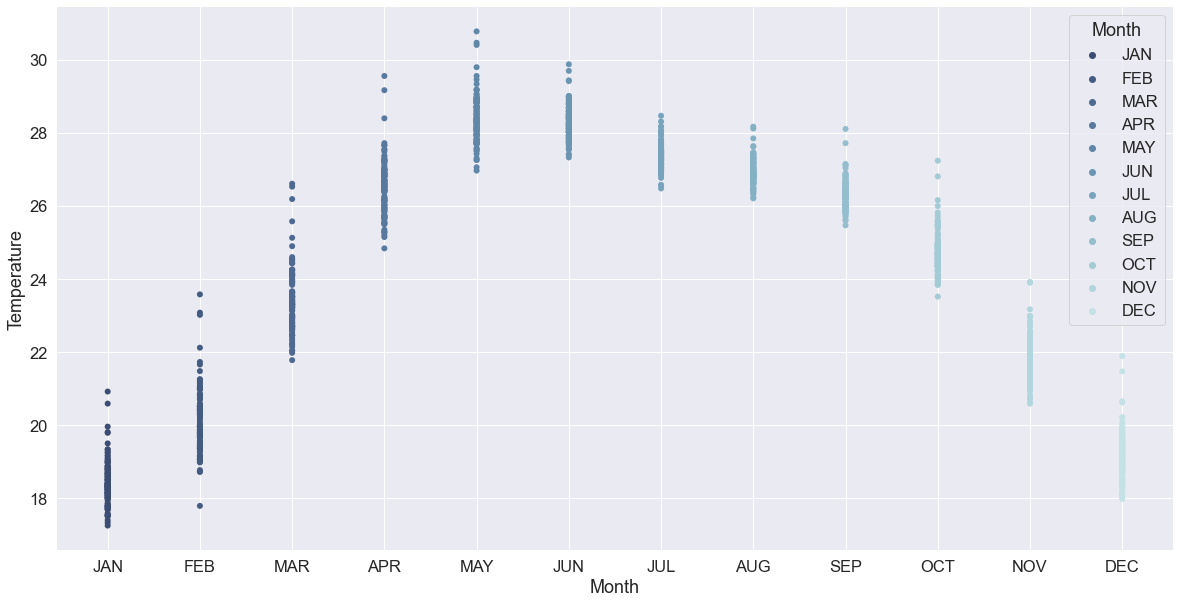

In [11]:
# Observing the variation of temperature in every month through the years 1901 to 2017 with a scatterplot
f, ax = plt.subplots(figsize=(20,10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Month", y="Temperature",
                hue="Month", 
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df1, ax=ax,)

In [12]:
# Extracting date and temperature from the previous dataframe
df2=df1[['Date','Temperature']].reset_index(drop=True)
df2

Date  Temperature
0    1901-01-01        17.99
1    1901-02-01        19.43
2    1901-03-01        23.49
3    1901-04-01        26.41
4    1901-05-01        28.28
...         ...          ...
1399 2017-08-01        28.12
1400 2017-09-01        28.11
1401 2017-10-01        27.24
1402 2017-11-01        23.92
1403 2017-12-01        21.47

[1404 rows x 2 columns]

In [13]:
# Observing the variation of temperature in every month through the years 1901 to 2017 with a boxplot
fig = px.box(df1, 'Month', 'Temperature')
fig.update_layout(title='Warmest, Coldest and Median Monthly Temperatue.')
fig.show()

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

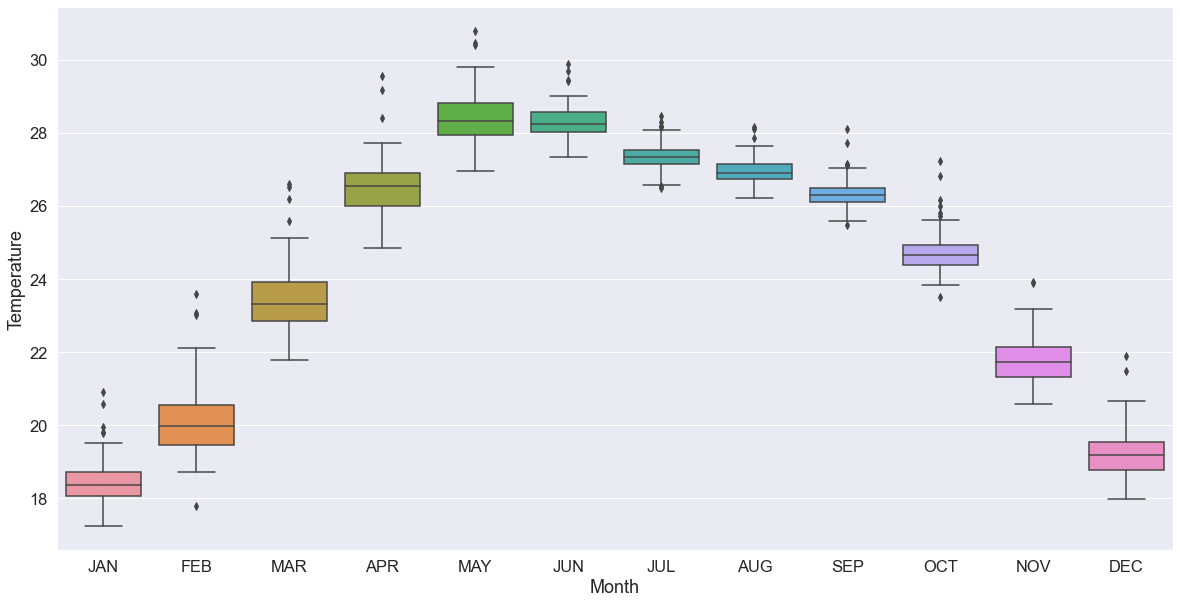

In [14]:
#Observing the variation of temperature in every month through the years 1901 to 2017 with colored boxplot
sns.boxplot(x="Month", y="Temperature", data=df1)

In [15]:
# Using unsupervised learning to extract clusters with scikitlean.cluster
from sklearn.cluster import KMeans
sse = []
target = df1['Temperature'].to_numpy().reshape(-1,1)
num_clusters = list(range(1, 10))

for k in num_clusters:
    km = KMeans(n_clusters=k)
    km.fit(target)
    sse.append(km.inertia_)

fig = go.Figure(data=[
    go.Scatter(x = num_clusters, y=sse, marker_color='rgba(255, 100, 100, 90)')
])
fig.update_layout(title="Evaluation on number of clusters:",
                 xaxis_title = "Number of Clusters:",
                 yaxis_title = "Sum of Squared Distance",
                 showlegend=False, 
                 )
fig.update_traces(mode='lines+markers', marker_line_width=2, marker_size=10)

fig.show()

In [16]:
# Viewing the temperature clusters
km = KMeans(3) 
km.fit(df1['Temperature'].to_numpy().reshape(-1,1))
df1.loc[:,'Temp Labels'] = km.labels_
fig = px.scatter(df1, 'Date', 'Temperature', color='Temp Labels')
fig.update_layout(title = "Temperature clusters.",
                 xaxis_title="Date", yaxis_title="Temperature")
fig.show()

In [17]:
km = KMeans(9) 
km.fit(df1['Temperature'].to_numpy().reshape(-1,1))
df1.loc[:,'Temp Labels'] = km.labels_
fig = px.scatter(df1, 'Date', 'Temperature', color='Temp Labels')
fig.update_layout(title = "Temperature clusters.",
                 xaxis_title="Date", yaxis_title="Temperature")
fig.show()

In [18]:
km = KMeans(4) # using a cluster of size 4
km.fit(df1['Temperature'].to_numpy().reshape(-1,1))
df1.loc[:,'Temp Labels'] = km.labels_
fig = px.scatter(df1, 'Date', 'Temperature', color='Temp Labels',
                 hover_data=['Month'],symbol='Month') # segregating months with symbols
fig.update_layout(title = "Temperature clusters.",
                 xaxis_title="Date", yaxis_title="Temperature",
                 showlegend=False, 
                 font=dict(
                     family="Algerian", 
                     size=18, 
                     color="firebrick"
                 )
)
fig.show()

In [19]:
# Looking at the frequency of various average temperatures throughout 1901 to 2017
fig = px.histogram(x=df1['Temperature'], nbins=200, histnorm='density',color_discrete_sequence=['indianred'] )
fig.update_layout(title='Frequency chart of temperature readings:',
                 xaxis_title='Temperature', yaxis_title='Count')

In [20]:
# Looking at the months for frequency of various average temperatures throughout 1901 to 2017
fig = px.histogram(x=df1['Temperature'], nbins=200, histnorm='density',color=df1['Month'])
fig.update_layout(title='Frequency chart of temperature readings:',
                 xaxis_title='Temperature', yaxis_title='Count')

In [21]:
df['Yearly Mean'] = df.iloc[:,1:].mean(axis=1)
fig = go.Figure(data=[
    go.Scatter(name='Yearly Temperatures' , x=df['YEAR'], y=df['Yearly Mean'], mode='lines'),
    go.Scatter(name='Yearly Temperatures' , x=df['YEAR'], y=df['Yearly Mean'], mode='markers')
])
fig.update_layout(title='Yearly Mean Temperature :',
                 xaxis_title='Time', yaxis_title='Temperature in Degrees')
fig.show()

fig = px.scatter(df,x = 'YEAR', y = 'Yearly Mean', trendline = 'lowess', color='Yearly Mean') # using lowess trendline
fig.update_layout(title='Trendline Over The Years :',
                 xaxis_title='Time', yaxis_title='Temperature in Degrees')
fig.show()

In [22]:
# Seeing the variation of average temperature through the years in each month separately
fig = px.line(df1, 'Year', 'Temperature', facet_col='Month', facet_col_wrap=4) 
fig.update_layout(title='Monthly temperature throught history:')
fig.add_trace(go.Scatter(line = dict(color='firebrick', width=4, dash='dot')))
fig.show()

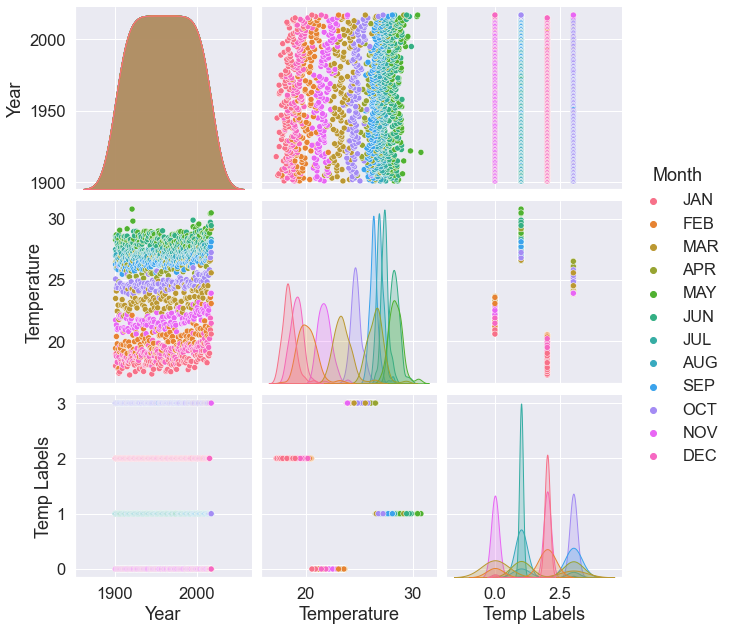

In [23]:
sns.pairplot(df1, hue='Month', height=3) # using pairplot

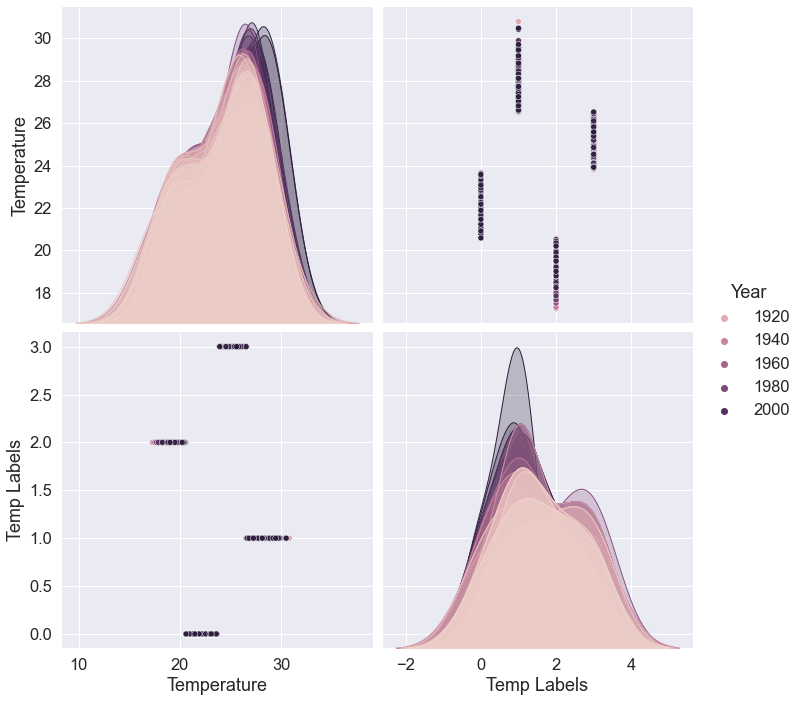

In [24]:
sns.pairplot(df1, hue='Year', height=5)

In [25]:
# Segregating the four seasons and adding them to seasonal_df
df['Winter'] = df[['DEC', 'JAN', 'FEB']].mean(axis=1)
df['Summer'] = df[['MAR', 'APR', 'MAY']].mean(axis=1)
df['Monsoon'] = df[['JUN', 'JUL', 'AUG', 'SEP']].mean(axis=1)
df['Autumn'] = df[['OCT', 'NOV']].mean(axis=1)
seasonal_df = df[['YEAR', 'Winter', 'Summer', 'Monsoon', 'Autumn']]
seasonal_df = pd.melt(seasonal_df, id_vars='YEAR', value_vars=seasonal_df.columns[1:])
seasonal_df.columns=['Year', 'Season', 'Temperature']

In [26]:
# Plotting the variation of temperature in various seasons
fig = px.scatter(seasonal_df, 'Year', 'Temperature', facet_col='Season', facet_col_wrap=2, trendline='ols',color="Season")
fig.update_layout(title='Seasonal mean temperatures throught years:')
fig.show()

In [27]:
# Adding more colors to highlight the temperature changes and trendline
fig = px.scatter(seasonal_df, 'Year', 'Temperature', facet_col='Season', facet_col_wrap=2, trendline='ols', color="Temperature")
fig.update_layout(title='Seasonal mean temperatures throught years:')
fig.show()

In [28]:
# Viewing the variation in temperature over the years through animation 
px.scatter(df1, 'Month', 'Temperature', size='Temperature', color='Temperature', animation_frame='Year')

## Forecast using decision tree regressor

In [29]:
# Using decision tree regressor for future prediction as the trendline was not a straight line
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 

df3 = df1[['Year', 'Month', 'Temperature']].copy() # Creating new dataframe with required columns
df3 = pd.get_dummies(df3)
y = df3[['Temperature']]
x = df3.drop(columns='Temperature')

dtr = DecisionTreeRegressor()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.30) # Performing the train test split
dtr.fit(train_x, train_y) # Training the model
pred = dtr.predict(test_x) # Predicting for the test values data
r2_score(test_y, pred) # To evaluate the performance of regression model

0.9640655192656413

In [31]:
next_Year = df1[df1['Year']==2017][['Year', 'Month']]
next_Year.Year.replace(2017,2018, inplace=True)
next_Year= pd.get_dummies(next_Year)
temp_2018 = dtr.predict(next_Year) # Predicting values for next year for the data

temp_2018 = {'Month':df1['Month'].unique(), 'Temperature':temp_2018}
temp_2018=pd.DataFrame(temp_2018)
temp_2018['Year'] = 2018
temp_2018

Month  Temperature  Year
0    JAN        20.59  2018
1    FEB        23.08  2018
2    MAR        25.58  2018
3    APR        29.17  2018
4    MAY        30.47  2018
5    JUN        29.44  2018
6    JUL        28.18  2018
7    AUG        28.12  2018
8    SEP        28.11  2018
9    OCT        27.24  2018
10   NOV        23.92  2018
11   DEC        21.47  2018

In [32]:
type(temp_2018)

pandas.core.frame.DataFrame

In [33]:
forecasted_temp = pd.concat([df1,temp_2018], sort=False).groupby(by='Year')['Temperature'].mean().reset_index()

In [34]:
forecasted_temp

Year  Temperature
0    1901    24.224167
1    1902    24.326667
2    1903    23.980833
3    1904    23.850000
4    1905    23.932500
..    ...          ...
113  2014    24.732500
114  2015    24.912500
115  2016    26.454167
116  2017    26.291667
117  2018    26.280833

[118 rows x 2 columns]

In [35]:
fig = go.Figure(data=[
    go.Scatter(name='Yearly Mean Temperature', x=forecasted_temp['Year'], y=forecasted_temp['Temperature'], mode='lines'),
    go.Scatter(name='Monthly Mean Temperature', x=forecasted_temp ['Year'], y=forecasted_temp['Temperature'], mode='markers')
    ])
fig.update_layout(title='Forecasted Temperature:',
                 xaxis_title='Time', yaxis_title='Temperature in Degrees')
fig.show()

In [36]:
forecasted_temp = pd.concat([df1,temp_2018], sort=False).groupby(by='Month')['Temperature'].mean().reset_index()
forecasted_temp

Month  Temperature
0    APR    26.536610
1    AUG    26.950085
2    DEC    19.192797
3    FEB    20.162881
4    JAN    18.441610
5    JUL    27.376102
6    JUN    28.310593
7    MAR    23.452373
8    MAY    28.404068
9    NOV    21.783983
10   OCT    24.763220
11   SEP    26.357627

In [37]:
forecasted_temp = pd.concat([df1,temp_2018], sort=False).groupby(by='Month')['Temperature'].mean().reset_index()
fig = go.Figure(data=[
    go.Scatter(name='Monthly Mean Temperature', x=forecasted_temp['Month'], y=forecasted_temp['Temperature'], mode='lines'),
    go.Scatter(name='Monthly Mean Temperature', x=forecasted_temp ['Month'], y=forecasted_temp['Temperature'], mode='markers')
])
fig.update_layout(title='Forecasted Temperature:',
                 xaxis_title='Time', yaxis_title='Temperature in Degrees')
fig.show()

## Forecast using SARIMA model

In [38]:
# Importing required libraries
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm_notebook
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

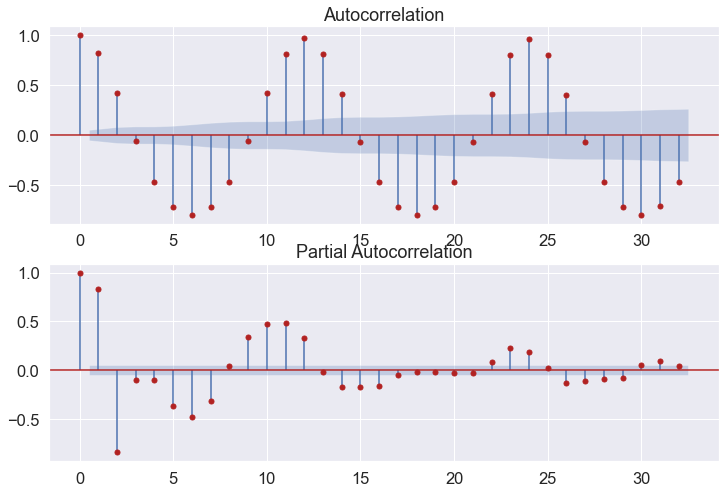

In [39]:
# Autocorrelation and partial autocorrelation plots
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.Temperature, ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1.Temperature, ax=ax2,color='firebrick')

In [40]:
result = adfuller(df1.Temperature)
print('ADF Statistic on the entire dataset: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the entire dataset: -0.9544420006214245
p-value: 0.7695159632734032
Critical Values:
	1%: -3.435097467737946
	5%: -2.8636366587977804
	10%: -2.5678862576139467


##### The above analysis shows that p value is not less than 0.5 and the ADF statistic is not less than the critical values and therefore the data is not stationary which is true as temperature throughout the year has seasonality.

In [41]:
df2

Date  Temperature
0    1901-01-01        17.99
1    1901-02-01        19.43
2    1901-03-01        23.49
3    1901-04-01        26.41
4    1901-05-01        28.28
...         ...          ...
1399 2017-08-01        28.12
1400 2017-09-01        28.11
1401 2017-10-01        27.24
1402 2017-11-01        23.92
1403 2017-12-01        21.47

[1404 rows x 2 columns]

In [42]:
N = len(df2.Temperature)
# train and test split
split = 0.90
training_size = round(split*N)
test_size = round((1-split)*N)
series = df2.Temperature[:training_size]
date = df2.Date[:training_size]
test_series = df2.Temperature[len(date)-1:len(df2)]
test_date = df2.Date[len(date)-1:len(df2)]

In [43]:
test_date

1263   2006-04-01
1264   2006-05-01
1265   2006-06-01
1266   2006-07-01
1267   2006-08-01
          ...    
1399   2017-08-01
1400   2017-09-01
1401   2017-10-01
1402   2017-11-01
1403   2017-12-01
Name: Date, Length: 141, dtype: datetime64[ns]

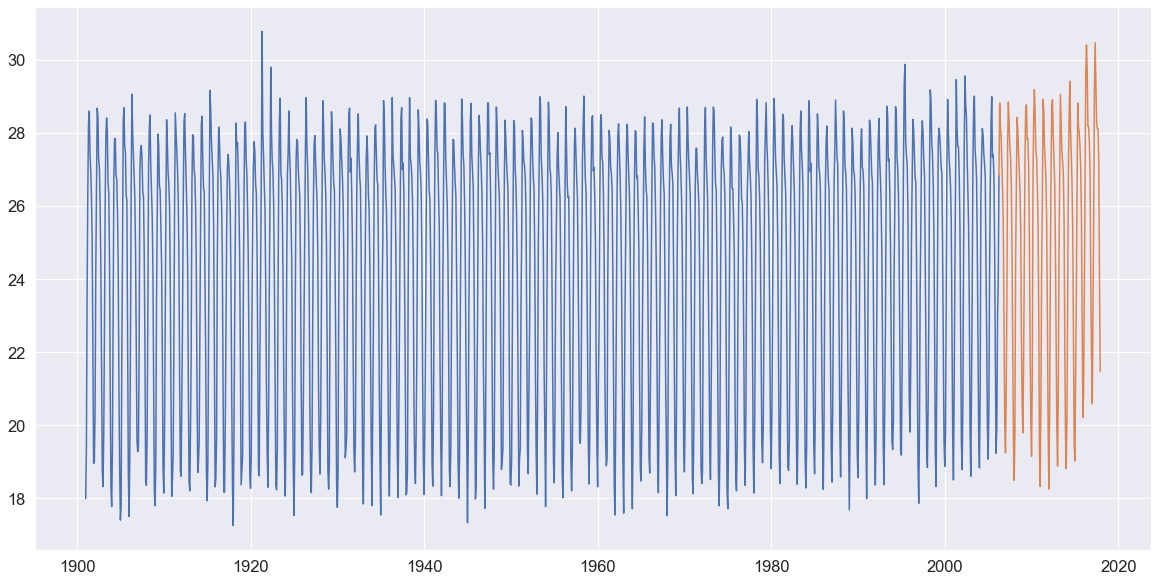

In [44]:
# Plotting the train and test data
plt.plot(date,series,label='Training Set')
plt.plot(test_date,test_series,label='Test Set')

In [45]:
# Creating a function optimize_ARIMA for using the SARIMA model
def optimize_ARIMA(order_list, exog):
    
    results = []
    
    for order in tqdm_notebook(order_list):
        model = SARIMAX(exog, order=order,initialization='approximate_diffuse').fit(disp=-1)            
        aic = model.aic
        results.append([order, model.aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [46]:
ps = range(0, 10, 1)
d = 0
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_0 = optimize_ARIMA(order_list, exog = series)

  0%|          | 0/100 [00:00<?, ?it/s]

In [47]:
result_d_0.head()

(p, d, q)          AIC
0  (7, 0, 8)  1952.710097
1  (6, 0, 7)  1960.126495
2  (6, 0, 6)  1980.960504
3  (7, 0, 7)  1988.431394
4  (6, 0, 8)  1999.939886

In [48]:
ps = range(0, 10, 1)
d = 1
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_1 = optimize_ARIMA(order_list, exog = series)

result_d_1

  0%|          | 0/100 [00:00<?, ?it/s]

(p, d, q)          AIC
0   (6, 1, 8)  1940.160060
1   (7, 1, 9)  1947.308776
2   (6, 1, 9)  1964.276338
3   (9, 1, 9)  1968.731619
4   (7, 1, 8)  1971.717186
..        ...          ...
95  (0, 1, 2)  4460.116376
96  (1, 1, 1)  4502.774581
97  (1, 1, 0)  4637.026886
98  (0, 1, 1)  4743.299207
99  (0, 1, 0)  5432.609500

[100 rows x 2 columns]

In [49]:
result_d_1.head()

(p, d, q)          AIC
0  (6, 1, 8)  1940.160060
1  (7, 1, 9)  1947.308776
2  (6, 1, 9)  1964.276338
3  (9, 1, 9)  1968.731619
4  (7, 1, 8)  1971.717186

#### The results show that (6,1,8) and (7,1,9) are the best models as they have the least AIC values.

In [50]:
final_result = result_d_0.append(result_d_1) # Adding the zero-diiferentiated ARIMA models to first-differentiated one.

In [51]:
best_models = final_result.sort_values(by='AIC', ascending=True).reset_index(drop=True).head() #Sorting the results by AIC value

In [52]:
best_models.head()

(p, d, q)          AIC
0  (6, 1, 8)  1940.160060
1  (7, 1, 9)  1947.308776
2  (7, 0, 8)  1952.710097
3  (6, 0, 7)  1960.126495
4  (6, 1, 9)  1964.276338

In [53]:
# Separating the (p,d,q) and AIC values.
best_model_params_0 = best_models[best_models.columns[0]][0]
best_model_params_1 = best_models[best_models.columns[0]][1]

In [54]:
# Extracting the summary of the models
best_model_0 = SARIMAX(series, order=best_model_params_0).fit()
print(best_model_0.summary())
best_model_1 = SARIMAX(series, order=best_model_params_1).fit()
print(best_model_1.summary())

                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                 1264
Model:               SARIMAX(6, 1, 8)   Log Likelihood                -902.299
Date:                Sun, 05 Dec 2021   AIC                           1834.599
Time:                        15:33:27   BIC                           1911.718
Sample:                             0   HQIC                          1863.576
                               - 1264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0463      0.066     15.822      0.000       0.917       1.176
ar.L2         -0.0379      0.127     -0.298      0.765      -0.287       0.211
ar.L3         -1.0703      0.120     -8.921      0.0

### Model (6,1,8) results

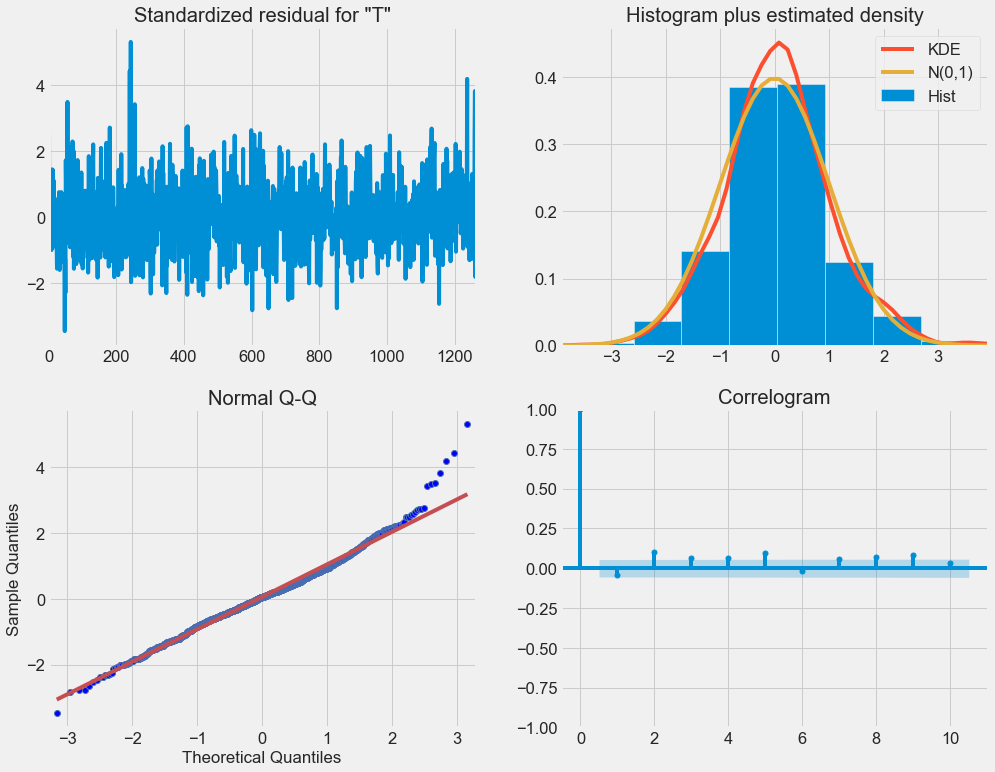

In [55]:
plt.style.use('fivethirtyeight')
best_model_0.plot_diagnostics(figsize=(15,12)) # Getting plot diagonostics
plt.show()

### Model (7,1,9) results

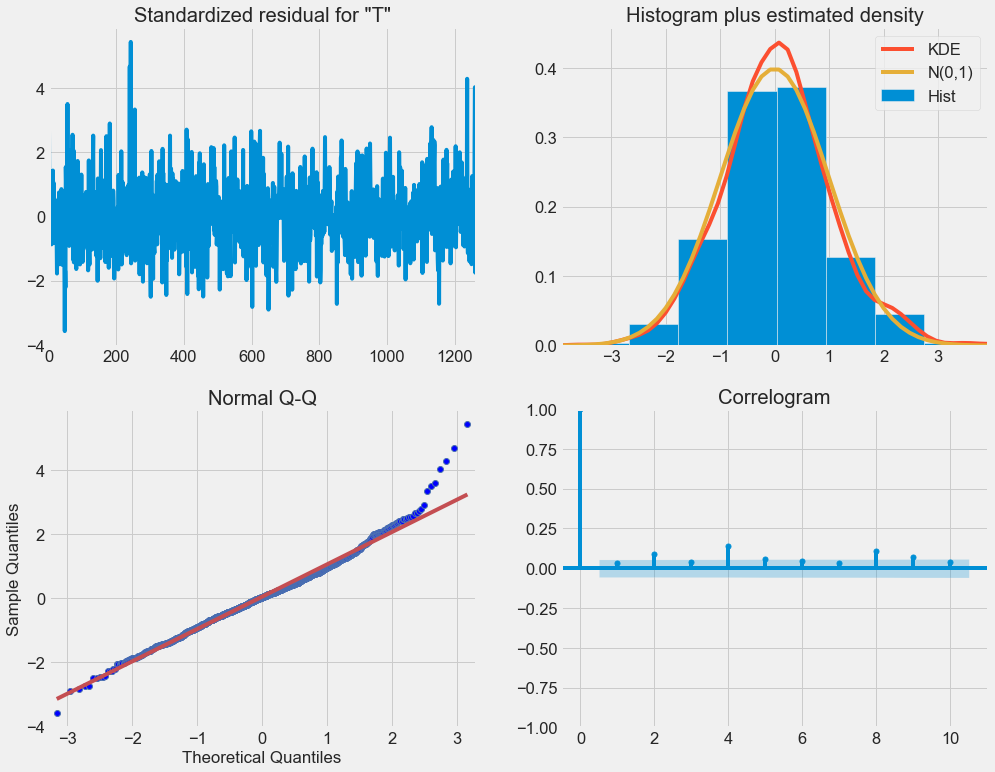

In [56]:
best_model_1.plot_diagnostics(figsize=(15,12))
plt.show()

In [57]:
fore_l= test_size-1
forecast = best_model_0.get_prediction(start=training_size, end=training_size+fore_l) # Predicting for test size using (6,1,8)
forec = forecast.predicted_mean
ci = forecast.conf_int(alpha=0.05) # Setting confidence interval

s_forecast = best_model_1.get_prediction(start=training_size, end=training_size+fore_l)# Predicting for test size using (7,1,9)
s_forec = s_forecast.predicted_mean
s_ci = forecast.conf_int(alpha=0.05)

In [58]:
forec = pd.DataFrame(data=forec)
forec.tail(10), df2.tail(10) # Comparing the last 10 values of actual data and prediction

(      predicted_mean
 1394       24.281234
 1395       27.277187
 1396       28.620569
 1397       28.437887
 1398       27.735533
 1399       27.172937
 1400       26.414197
 1401       24.705843
 1402       22.035326
 1403       19.605176,
            Date  Temperature
 1394 2017-03-01        25.58
 1395 2017-04-01        29.17
 1396 2017-05-01        30.47
 1397 2017-06-01        29.44
 1398 2017-07-01        28.31
 1399 2017-08-01        28.12
 1400 2017-09-01        28.11
 1401 2017-10-01        27.24
 1402 2017-11-01        23.92
 1403 2017-12-01        21.47)

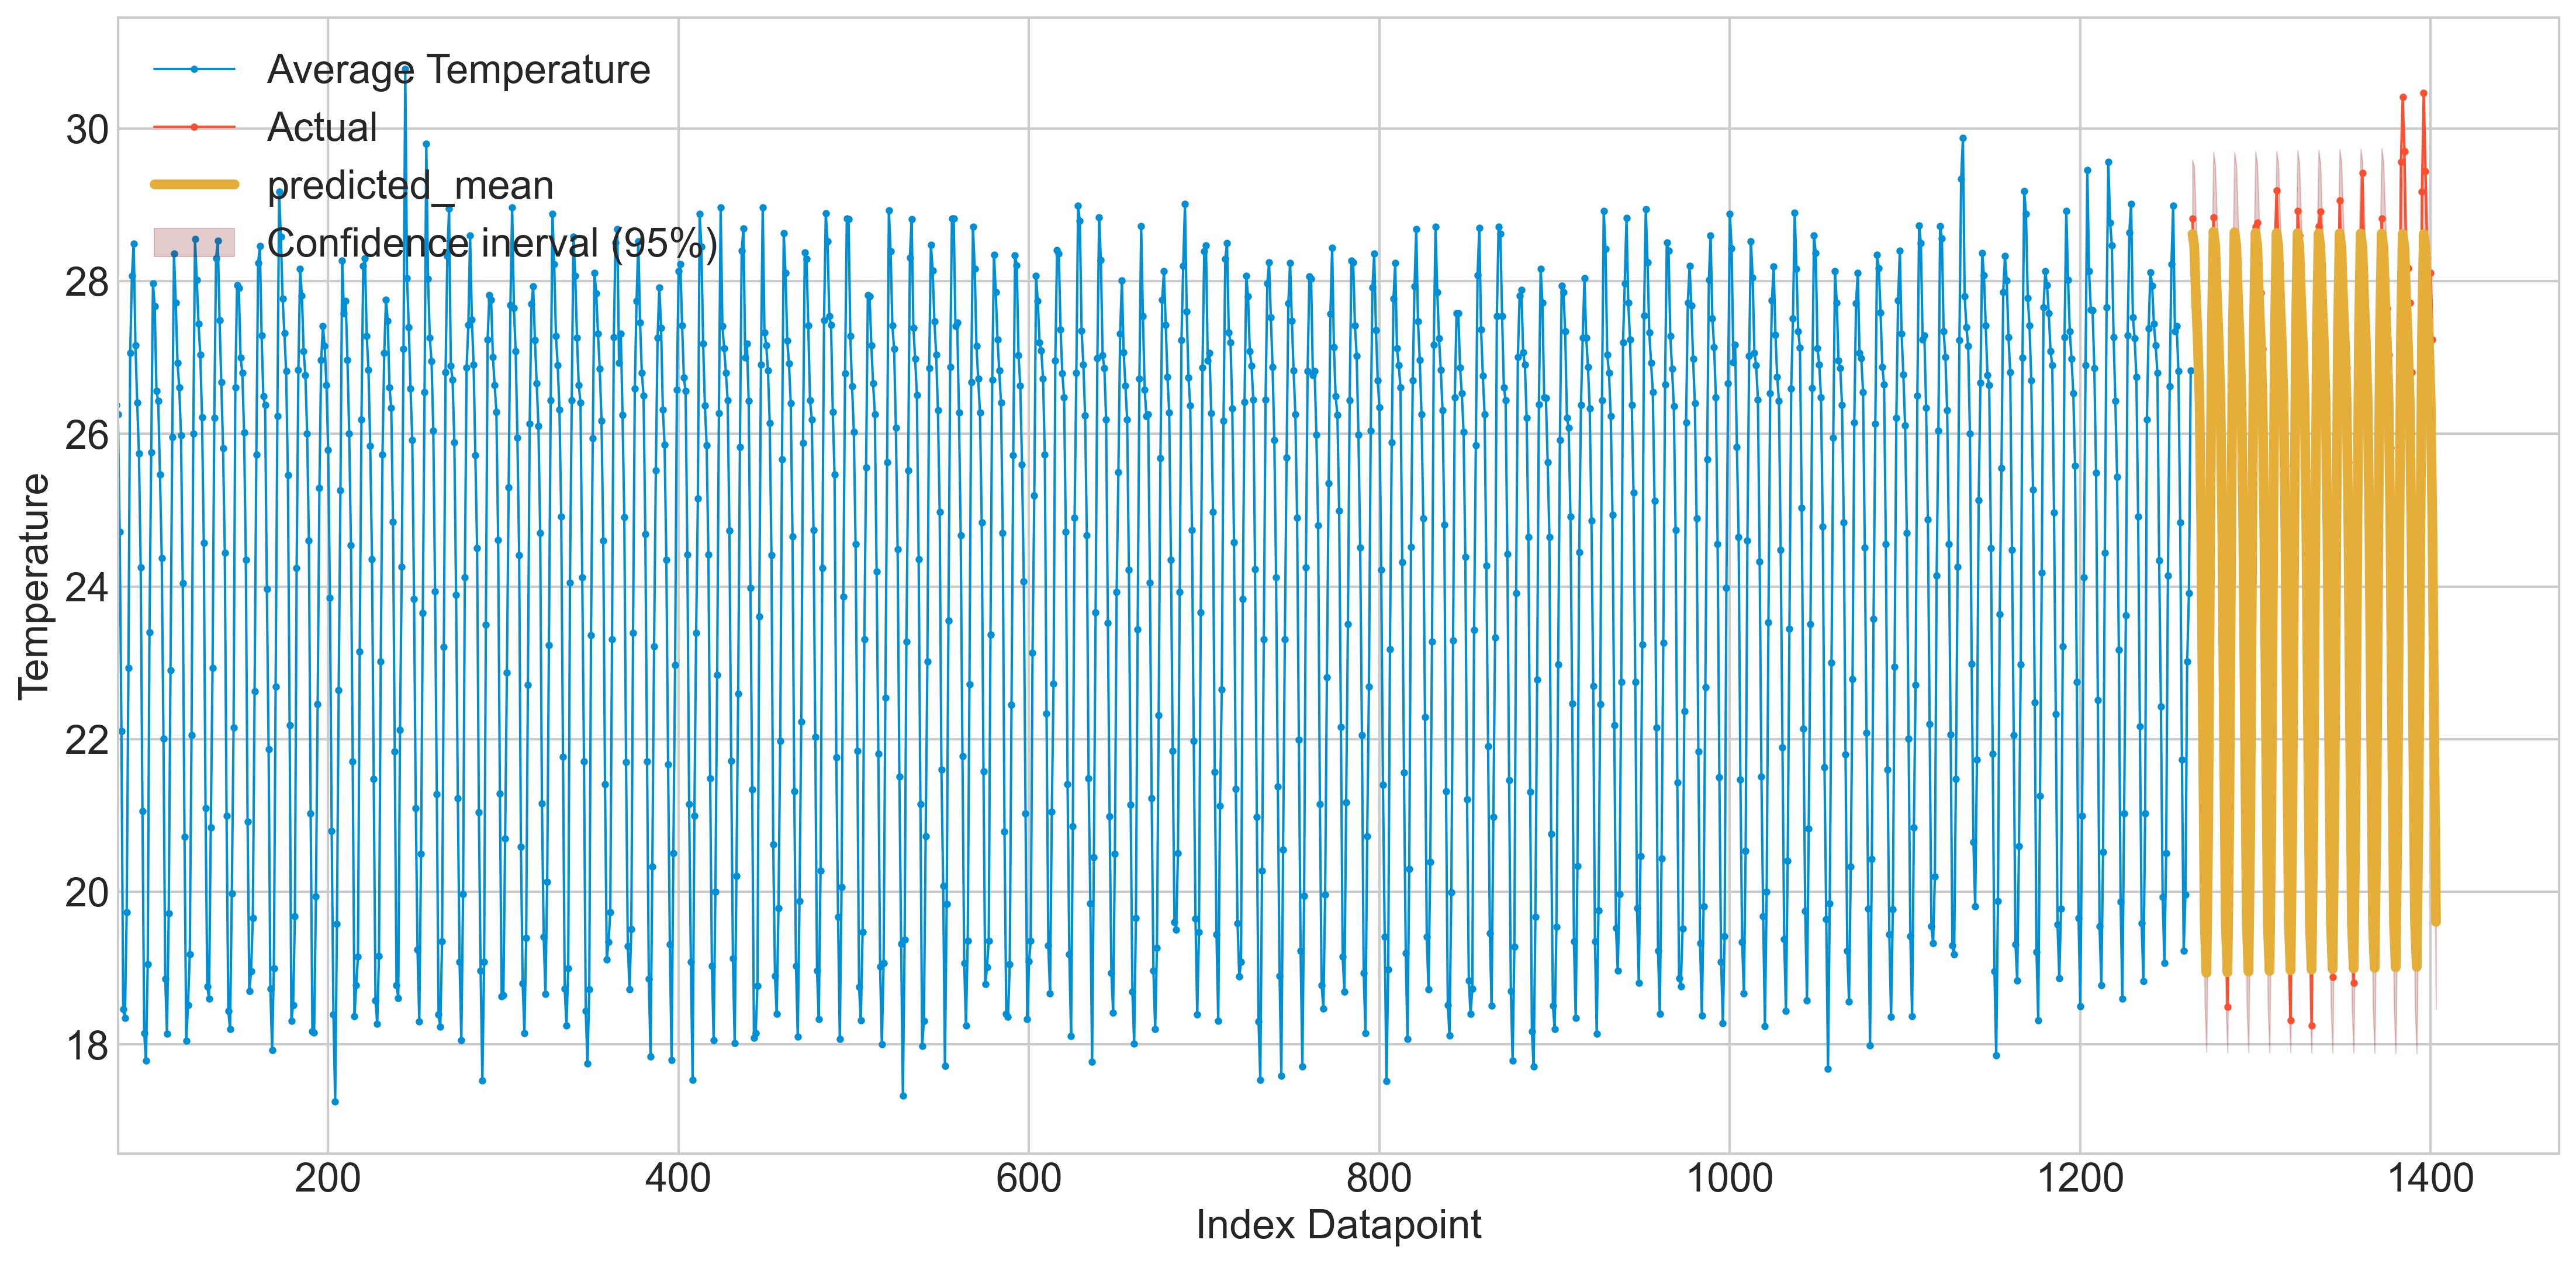

In [59]:
# Plotting the training, predicted, actual values and confidence interval on the same plot for better comparison
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(16,8), dpi=300)
x0 = df2.Temperature.index[0:training_size]
x1= df2.Temperature.index[training_size:training_size+fore_l+1]

plt.plot(x0, df2.Temperature[0:training_size], marker='o',linewidth=1, markersize=2, 
         label = 'Average Temperature')

plt.plot(df2.Temperature[training_size:training_size+fore_l],  marker='o',linewidth=1, markersize=2,
         label = 'Actual')


forec.plot(ax=ax, label = 'Forecast')
ax.fill_between(x1, ci['lower Temperature'], ci['upper Temperature'],alpha=0.2, label = 'Confidence inerval (95%)',
                color='maroon')



plt.legend(loc = 'upper left')
plt.xlim(80)
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
plt.show()

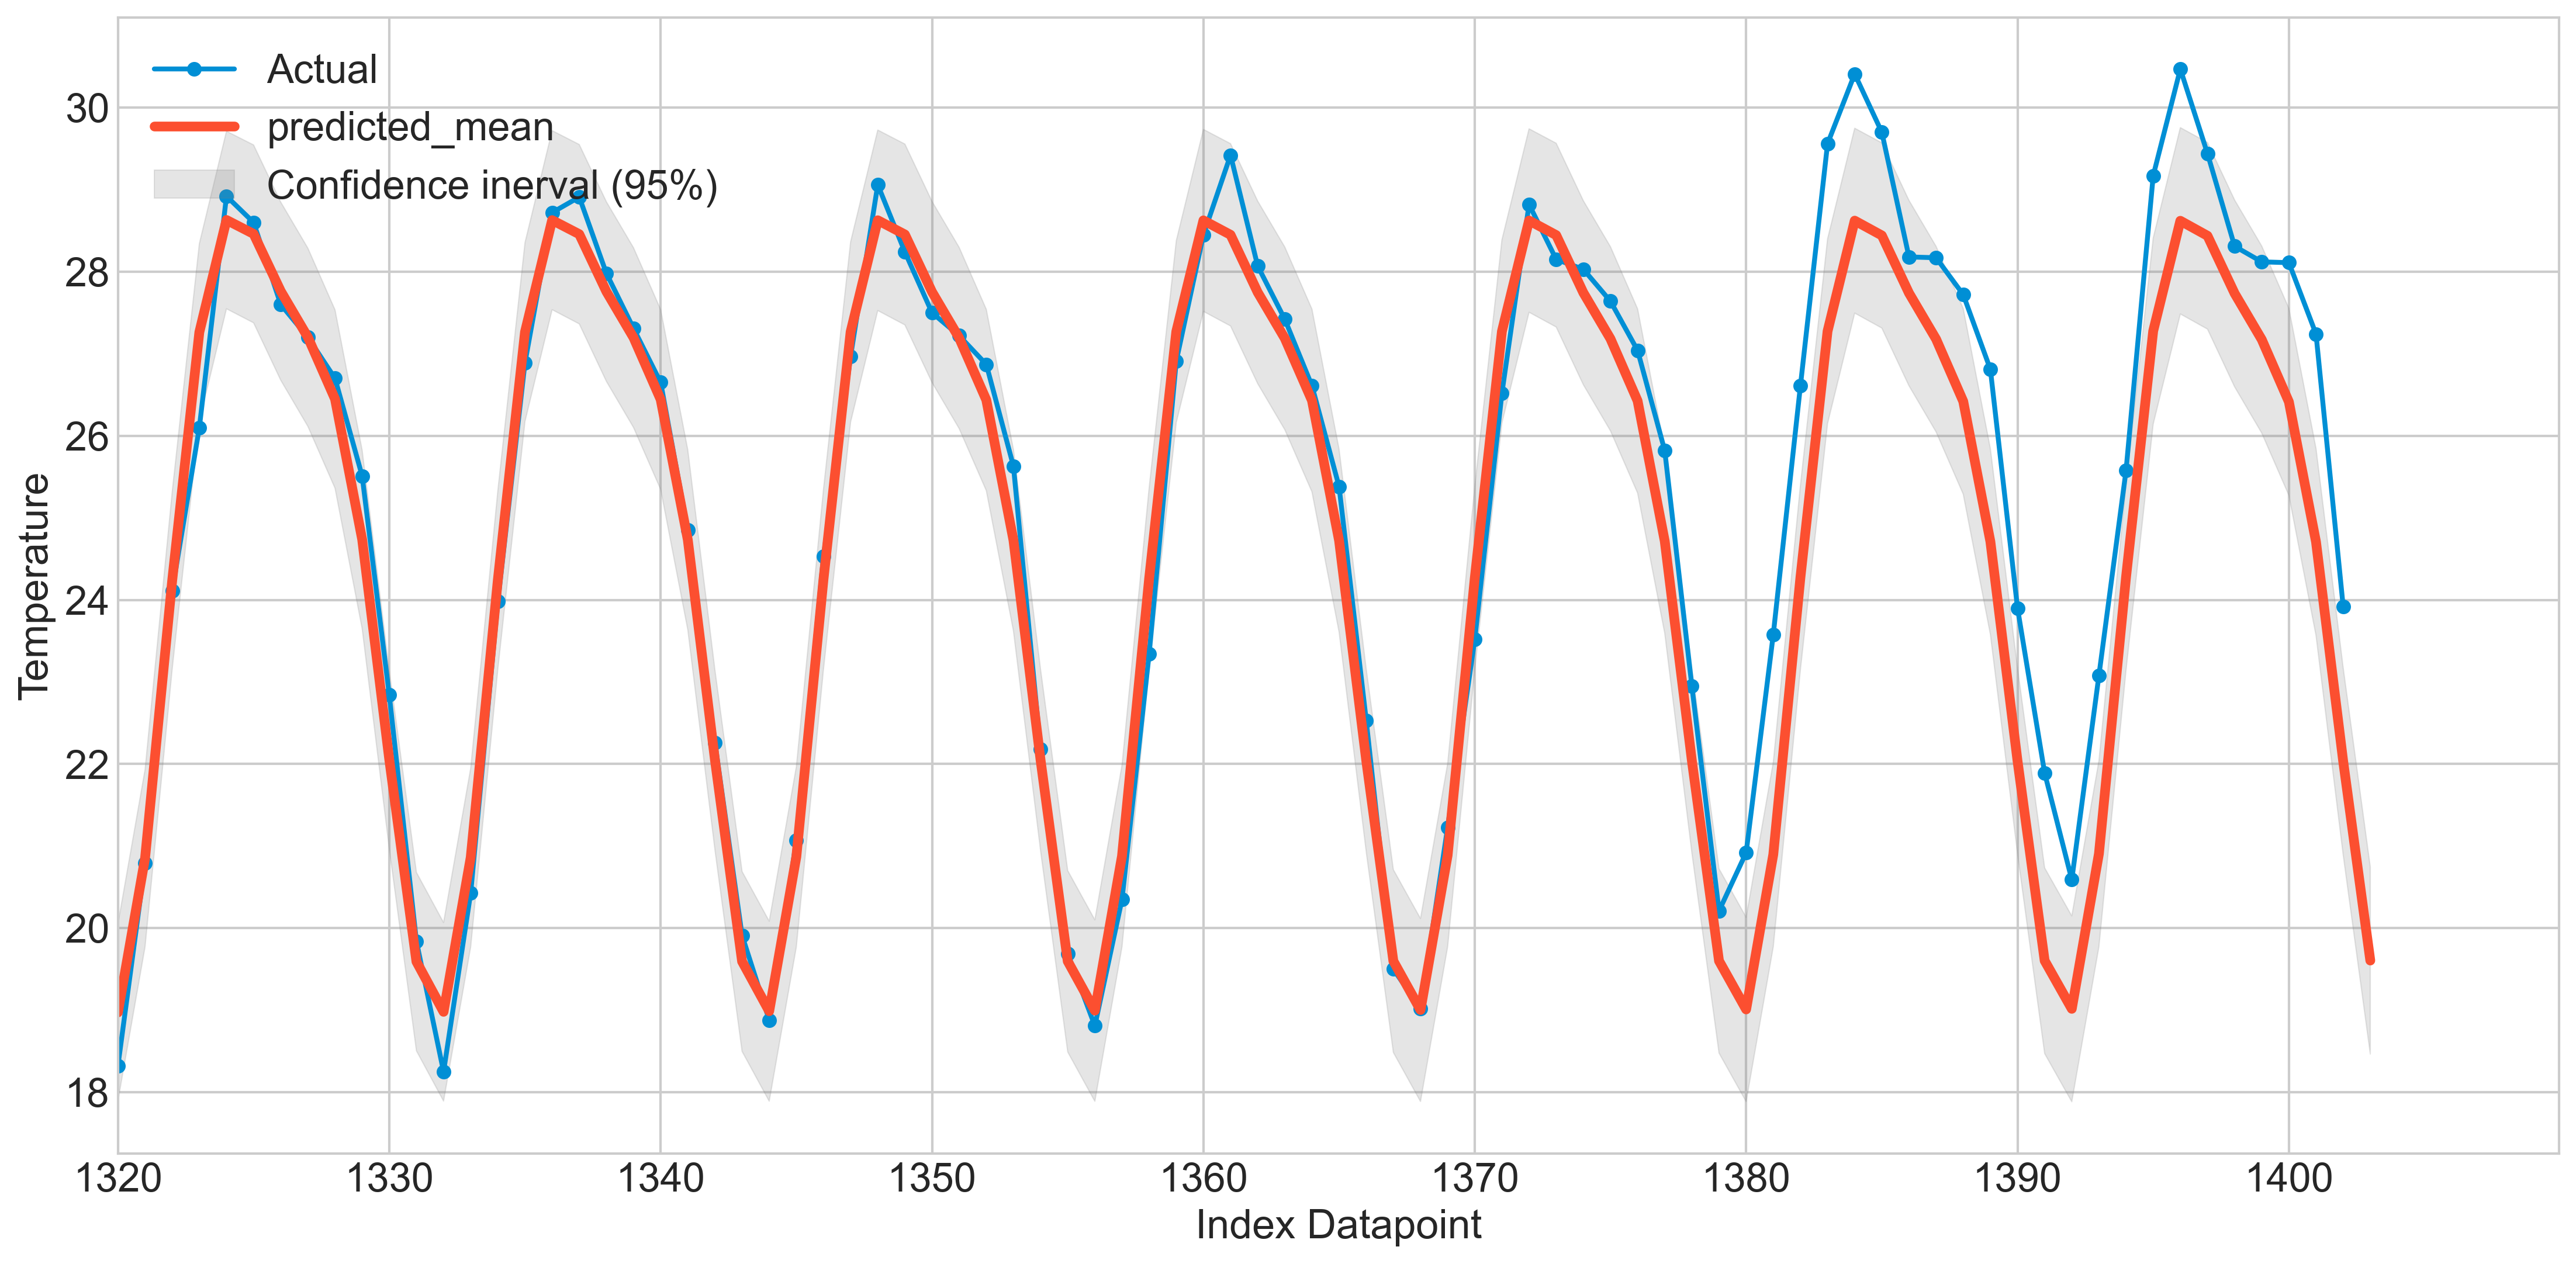

In [60]:
# Looking at the predicted, actual values and confidence interval on the same plot
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(16,8), dpi=300)
plt.plot(df2.Temperature[training_size:training_size+fore_l], marker='o',linewidth=2, markersize=5,
         label = 'Actual')
forec.plot(ax=ax,label = 'Forecast ')
ax.fill_between(x1, ci['lower Temperature'], ci['upper Temperature'],alpha=0.2, label = 'Confidence inerval (95%)',color='grey')

plt.legend(loc = 'upper left')
plt.xlim(1320)
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
plt.show()